In [30]:
import heapq
import copy

class Node:
    """ 
    A class that implements relevant properties of nodes

    Attributes
    ----------
    name : str
        A one letter string representing a unique node
        
    number: int
        An integer representing the ASCII code - 65 (so that A = 0) 
        of the name of the letter. Used as the index of the adjacency
        list/array that represents the node.
      """  
    
    def __init__(self, name):
        self.name = name
        self.number = ord(name) - 65
    
    def __lt__(self, other):
        """ 
        Overloaded operator so that we can use the heapq module with instances
        of this class.
        
        Parameters
        ----------
            other: Node
                The node we want to compare the current node to
        Returns
        ----------
            Bool
                The truth value of whether the other node is larger than the current
        """
        return (self.number < other.number)

class Graph:
    """ 
    A class that implements an undirected network

    Attributes
    ----------
    n : int
        The number of nodes in the graph
    """  
    def __init__(self, n):
        self.n = n
        self.adjacency_matrix = [[float('inf') for _ in range(n)] for _ in range(n)]
        self.adjacency_list = [[] for _ in range(n)]
        self.edges = []

    def add_edge(self, node1, node2, weight):
        """ 
        Add a weighted undirected edge between two nodes to the Graph
        Parameters
        ----------
            node1: Node
                the first node
                
            node2: Node
                the second node 
                
            weight: float
                the weight of the edge
        Returns
        ----------
            None
        """
        #add to the adjacency matrix
        self.adjacency_matrix[node1.number][node2.number] = weight
        self.adjacency_matrix[node2.number][node1.number] = weight
        
        #add to the adjacency list
        self.adjacency_list[node1.number].append(node2)
        self.adjacency_list[node2.number].append(node1)
        
        #heaappush into the priority queue of edges
        heapq.heappush(self.edges, (weight, node1, node2))
    
    def add_edge_list(self, edge_list):
        """ 
        Add a list of weighted undirected edges to the Graph
        
        Parameters
        ----------
            edge_list: lst
                list of 3-tuples each representing an edge in the form
                (node1, node2, weight) 
        Returns
        ----------
            None
        """
        #go through each edge
        for edge in edge_list:
            
            #use the add_edge method to add the current edge to the Graph
            self.add_edge(edge[0], edge[1], edge[2])
    
    def CycleCheck(self, node1, node2, adjacency_list):
        """ 
        Checks if adding an edge between node1 and node 2 creates a cycle
        
        Parameters
        ----------
            node1: Node
                the first node
                
            node2: Node
                the second node
            
            adjacency_list: lst
                the adjacency list of the graph we want to check
        Returns
        ----------
            Bool
                True if the edge creates a cycle, false otherwise
                
        """
        #get node 1 and node 2's adjacencies
        node1_connections = adjacency_list[node1.number]
        node2_connections = adjacency_list[node2.number]
        
        #initialize lists where we can fill up the
        #names of the adjacent nodes for simpler comparisons
        node1_connections_easy = []
        node2_connections_easy = []
        
        #fill up node1_connections_easy
        for connection in node1_connections:
            node1_connections_easy.append(connection.name)
        
        #fill up node2_connections_easy
        for connection in node2_connections:
            node2_connections_easy.append(connection.name)
        
        #check all of node 1's adjacencies
        for connection in node1_connections_easy:
                
                #if it is also adjacent to node 2, there is
                #a cycle
                if connection in node2_connections_easy:
                    return True
        
        return False
    
    def Kruskal(self):
        """ 
        Implements Kruskal's algorithm on the Graph to find
        an MST
        
        Parameters
        ----------
            None
            
        Returns
        ----------
            lst
                The adjacency list of the Graph's MST
                
        """
        
        #if there are only 0 or 1 nodes, there are no edges so
        #return the empty adjacency list
        if self.n < 2:
            return self.adjacency_list
        
        #create an empty adjacency list for the MST that will
        #contain Node instances
        mst_adjacency_list = [[] for _ in range(self.n)]
        
        #create an adjacency list for the MST that will contain the
        #letters of the nodes
        understandable_adjacency_list = [[] for _ in range(self.n)]
        
        #create a shallow copy of the edge heap
        edges_copy = copy.copy(self.edges)
        
        #while the edge heap still has edges in it
        while edges_copy:
            
            #get the smallest edge
            current_edge = heapq.heappop(edges_copy)
            
            #create a copy of the mst adjacency list
            mst_adjacency_list_copy = mst_adjacency_list
            
            #put the current edge in the adjacency list
            mst_adjacency_list_copy[current_edge[1].number].append(current_edge[2])
            mst_adjacency_list_copy[current_edge[2].number].append(current_edge[1])
            
            #if the current edge does not create a cycle 
            if self.CycleCheck(current_edge[1], current_edge[2], mst_adjacency_list_copy) == False:
                
                #add the current edge to the real mst adjacency list
                mst_adjacency_list = mst_adjacency_list_copy
                
                #add the current edge to the understandable adjacency list
                understandable_adjacency_list[current_edge[1].number].append(current_edge[2].name)
                understandable_adjacency_list[current_edge[2].number].append(current_edge[1].name)
        
        #return the understandable adjacency list
        return understandable_adjacency_list
    
    def Prim(self):
        """ 
        Implements Prim's algorithm on the Graph to find
        an MST
        
        Parameters
        ----------
            None
            
        Returns
        ----------
            lst
                The adjacency list of the Graph's MST
                
        """
        #if there are only 0 or 1 nodes, there are no edges so
        #return the empty adjacency list
        if self.n < 2:
            return self.adjacency_list
        
        #create an empty adjacency list for the mst
        mst_adjacency_list = [[] for _ in range(self.n)]
        
        #create a copy of the Graph's adjacency matrix
        adjacency_matrix_copy = copy.copy(self.adjacency_matrix)
        
        #initialize the non_visited_nodes list by filling it
        #up with the nodes' numbers
        non_visited_nodes = [i for i in range(self.n)]
        
        #initialize the visited_nodes list by putting the first element
        #of the non_visited_nodes list
        visited_nodes = [non_visited_nodes.pop(0)]
        
        #while there are still some unvisited nodes
        while non_visited_nodes:
            
            #initialize a smallest edge
            smallest_edge = (float('inf'), None, None)
            
            #check every visited node
            for node in visited_nodes:
                
                #get the current node's adjacencies
                adjacencies = adjacency_matrix_copy[node]
                
                #find the smallest edge connecting the current visited node
                #and the 
                closest = min(adjacencies)
                
                #if this edge is smaller than the smallest edge found and the other node it is
                #connected to has not been visited
                if closest < smallest_edge[0] and adjacencies.index(closest) in non_visited_nodes:
                    
                    #save it as the smallest edge found
                    smallest_edge = (min(adjacencies), node, adjacencies.index(closest))
            
            #if the smallest edge was not changed, we are done so return
            #the adjacency list of the mst
            if smallest_edge == (float('inf'), None, None):
                return mst_adjacency_list
            
            #remove the adjacency between the two nodes so that it does not get considered
            #another time
            adjacency_matrix_copy[smallest_edge[1]][smallest_edge[2]] = float('inf')
            adjacency_matrix_copy[smallest_edge[2]][smallest_edge[1]] = float('inf')
            
            #add the smallest edge to the mst's adjacency matrix
            mst_adjacency_list[smallest_edge[1]].append(chr(65 + smallest_edge[2]))
            mst_adjacency_list[smallest_edge[2]].append(chr(65 + smallest_edge[1]))
            
            #remove the newly visited node from the list of unvisited nodes
            #and add it to the list of visited nodes
            non_visited_nodes.remove(smallest_edge[2])
            visited_nodes.append(smallest_edge[2])
                
        return mst_adjacency_list

In [40]:
#general graph
G1 = Graph(5)
G1.add_edge(Node('A'), Node('B'), 2)
G1.add_edge(Node('A'), Node('C'), 1)
G1.add_edge(Node('C'), Node('B'), 3)
G1.add_edge(Node('C'), Node('D'), 1)
G1.add_edge(Node('D'), Node('B'), 4)
G1.add_edge(Node('C'), Node('E'), 6)
G1.add_edge(Node('E'), Node('A'), 5)

assert G1.Kruskal() == [['C', 'B', 'E'], ['A'], ['A', 'D'], ['C'], ['A']]
assert G1.Prim() == [['C', 'B', 'E'], ['A'], ['A', 'D'], ['C'], ['A']]

In [41]:
#disconnected graphs
G2 = Graph(4)
G2.add_edge(Node('A'), Node('B'), 2)
G2.add_edge(Node('C'), Node('D'), 1)

assert G2.Kruskal() == [['B'], ['A'], ['D'], ['C']]
assert G2.Prim() == [['B'], ['A'], [], []]

G3 = Graph(7)
G3.add_edge(Node('A'), Node('B'), 2)
G3.add_edge(Node('A'), Node('C'), 1)
G3.add_edge(Node('C'), Node('B'), 3)
G3.add_edge(Node('C'), Node('D'), 1)
G3.add_edge(Node('E'), Node('F'), 1)
G3.add_edge(Node('G'), Node('F'), 10)
assert G3.Kruskal() == [['C', 'B'], ['A'], ['A', 'D'], ['C'], ['F'], ['E', 'G'], ['F']]
assert G3.Prim() == [['C', 'B'], ['A'], ['A', 'D'], ['C'], [], [], []]

In [42]:
#graph with no nodes and no edges
G4 = Graph(0)

assert G4.Kruskal() == []
assert G4.Prim() == []

In [43]:
#complete graph
import random

G5 = Graph(5)

all_nodes = []
all_edges = []

for i in range(5):
    new_node = Node(chr(65+i))
       
    for node in all_nodes:
        if i == 4:
            all_edges.append((new_node, node, 1))
        
        else:    
            all_edges.append((new_node, node, 2))

    all_nodes.append(new_node)
        
G5.add_edge_list(all_edges)

assert G5.Kruskal() == [['E'], ['E'], ['E'], ['E'], ['A', 'B', 'C', 'D']]
assert G5.Prim() == [['E'], ['E'], ['E'], ['E'], ['A', 'B', 'C', 'D']]

In [10]:
import random
import matplotlib.pyplot as plt
import time

def simulation_complete(trials, method):
    
    all_edges = []
    all_nodes = []
    number_of_nodes = []
    times = []

    for i in range(trials):
        
        number_of_nodes.append(i)

        G = Graph(i)
        new_node = Node(chr(64+i))

        for node in all_nodes:
            all_edges.append((new_node, node, random.random()))
            
        all_nodes.append(new_node)
        G.add_edge_list(all_edges)
        
        start = time.process_time()

        if method == 'Kruskal':
            mst = G.Kruskal()
        else:
            G.Prim()

        end = time.process_time()
        
        times.append(end - start)

    return times, number_of_nodes

def create_graph_complete(method, max_size):
    
    compiled_results = []
    results = []
    
    for i in range(50):
        results.append(simulation_complete(max_size, method)[0])
        
    input_size = simulation_complete(max_size, method)[1]
    
    for i in range(max_size):
        
        result = 0
        
        for j in range(50):
            
            result += results[j][i]
        
        compiled_results.append(result/50)
    
    return input_size, compiled_results

prim_complete = create_graph_complete('Prim', 100)
kruskal_complete = create_graph_complete('Kruskal', 100)

In [37]:
import random
import matplotlib.pyplot as plt
import time

def simulation_constant_nodes(trials, method):
    
    all_edges = []
    number_of_edges = []
    times = []

    G = Graph(20)
    
    nodes = [Node(chr(65+i)) for i in range(20)]

    for i in range(trials):
        
        number_of_edges.append(i)
        sample = random.sample(nodes, 2)
        all_edges.append((sample[0], sample[1], random.random()))
        
        G.add_edge_list(all_edges)

        start = time.process_time()
            
        if method == 'Kruskal':
            mst = G.Kruskal()
            
        else:
            mst = G.Prim()
            
        end = time.process_time()
        
        times.append(end-start)

    return times, number_of_edges

def create_graph_nodes(method, max_size):
    
    compiled_results = []
    results = []
    
    for i in range(10):
        print(i)
        results.append(simulation_constant_nodes(max_size, method)[0])
        
    input_size = simulation_constant_nodes(max_size, method)[1]
    
    for i in range(max_size):
        result = 0
        
        for j in range(10):
            result += results[j][i]
        
        compiled_results.append(result/10)
    
    return input_size, compiled_results

prim_nodes = create_graph_nodes('Prim', 100)
kruskal_nodes = create_graph_nodes('Kruskal', 100)

0
1
2
3
4
5
6
7
8
9
0
1
2
3
4
5
6
7
8
9


In [14]:
import random
import matplotlib.pyplot as plt
import time

def simulation_constant_edges(trials, method):
    
    all_edges = []
    all_nodes = []
    number_of_nodes = []
    times = []
    
    edges = 20
    for i in range(10):
        all_nodes.append(Node(chr(64+i)))
        
    for i in range(10, trials+1):
        
        G = Graph(i)
        
        all_nodes.append(Node(chr(64+i)))
        number_of_nodes.append(i)
        
        for i in range(20):
            sample = random.sample(all_nodes, 2)
            all_edges.append((sample[0], sample[1], random.random()))
            
        G.add_edge_list(all_edges)

        start = time.process_time()

        if method == 'Kruskal':
            mst = G.Kruskal()
        else:
            mst = G.Prim()

        end = time.process_time()
        
        times.append(end - start)
        
    return times, number_of_nodes

def create_graph_edges(method, max_size):
    
    compiled_results = []
    results = []
    
    for i in range(50):
        results.append(simulation_constant_edges(max_size, method)[0])
        
    input_size = simulation_constant_edges(max_size, method)[1]
    
    for i in range(max_size-9):
        
        result = 0
        
        for j in range(50):
            
            result += results[j][i]
        
        compiled_results.append(result/50)
    
    return input_size, compiled_results

prim_edges = create_graph_edges('Prim', 100)
kruskal_edges = create_graph_edges('Kruskal', 100)

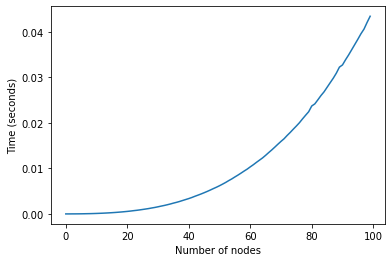

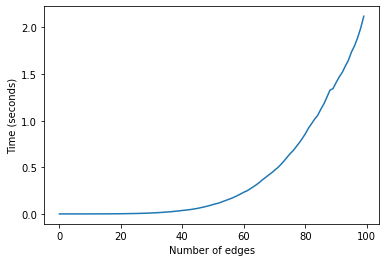

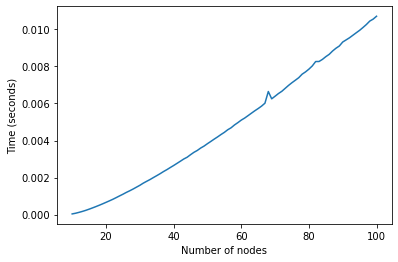

In [38]:
#kruskal's time complexity simulations

plot1 = plt.figure(1)
plt.plot(kruskal_complete[0], kruskal_complete[1])
plt.xlabel('Number of nodes')
plt.ylabel('Time (seconds)')

plot2 = plt.figure(2)
plt.plot(kruskal_nodes[0], kruskal_nodes[1])
plt.xlabel('Number of edges')
plt.ylabel('Time (seconds)')

plot3 = plt.figure(3)
plt.plot(kruskal_edges[0], kruskal_edges[1])
plt.xlabel('Number of nodes')
plt.ylabel('Time (seconds)')

plt.show()

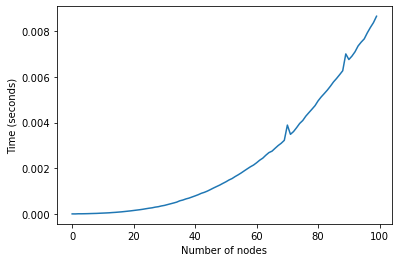

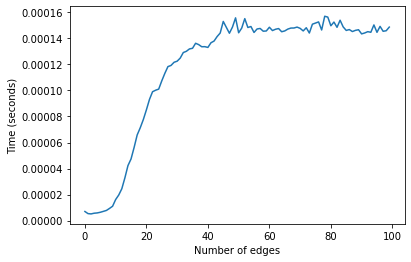

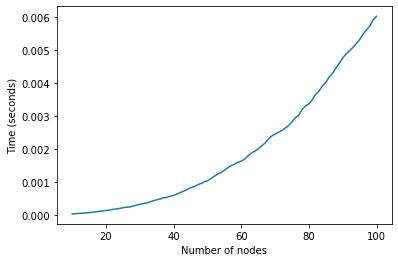

In [33]:
#prim's time complexity simulations
plot1 = plt.figure(1)
plt.plot(prim_complete[0], prim_complete[1])
plt.xlabel('Number of nodes')
plt.ylabel('Time (seconds)')

plot2 = plt.figure(2)
plt.plot(prim_nodes[0], prim_nodes[1])
plt.xlabel('Number of edges')
plt.ylabel('Time (seconds)')

plot3 = plt.figure(3)
plt.plot(prim_edges[0], prim_edges[1])
plt.xlabel('Number of nodes')
plt.ylabel('Time (seconds)')

plt.show()

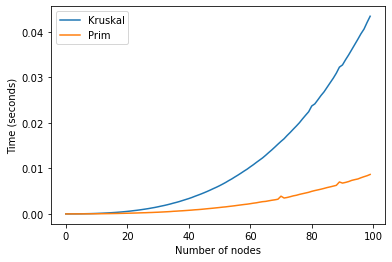

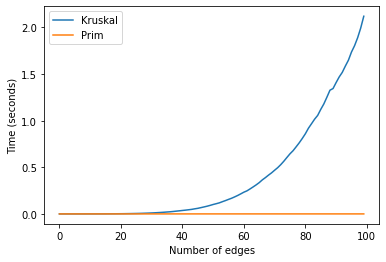

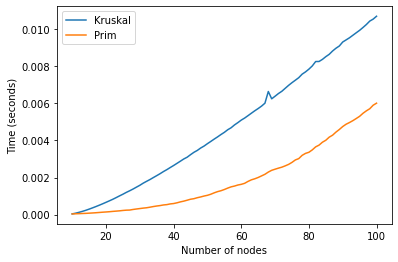

In [39]:
#time complexity comparisons
plot1 = plt.figure(1)
plt.plot(kruskal_complete[0], kruskal_complete[1], label = 'Kruskal')
plt.plot(prim_complete[0], prim_complete[1], label = 'Prim')
plt.xlabel('Number of nodes')
plt.ylabel('Time (seconds)')
plt.legend()

plot2 = plt.figure(2)
kruskal_nodes
plt.plot(kruskal_nodes[0], kruskal_nodes[1], label = 'Kruskal')
plt.plot(prim_nodes[0], prim_nodes[1], label = 'Prim')
plt.xlabel('Number of edges')
plt.ylabel('Time (seconds)')
plt.legend()

plot3 = plt.figure(3)
kruskal_edges
plt.plot(kruskal_edges[0], kruskal_edges[1], label = 'Kruskal')
plt.plot(prim_edges[0], prim_edges[1], label = 'Prim')
plt.xlabel('Number of nodes')
plt.ylabel('Time (seconds)')
plt.legend()

plt.show()

In [ ]:
#Failed codes for Prim's algorithm
#Worked on them for too long to delete them...

'''
def Prim(self):

    mst_adjacency_list = [[] for _ in range(self.n)]
    understandable_adjacency_list = [[] for _ in range(self.n)]

    current_node = self.nodes[0]
    mst_nodes = [current_node.name]

    lst = []

    while len(mst_nodes) < self.n:

        current_node.key = float('inf')

        connections = self.adjacency_list[current_node.number]

        for node in connections:

            if node.name not in mst_nodes:

                if node.key > self.adjacency_matrix[current_node.number][node.number]:

                    node.key = self.adjacency_matrix[current_node.number][node.number]

            heapq.heappush(lst, (node.key, node))

        next_node = heapq.heappop(lst)[1]

        while self.CycleCheck(current_node, next_node, mst_adjacency_list) == True and next_node.name not in mst_nodes:

            next_node = heapq.heappop(lst)[1]

        mst_adjacency_list[current_node.number].append(next_node)
        understandable_adjacency_list[current_node.number].append(next_node.name)

        current_node = next_node
        mst_nodes.append(current_node.name)

    return understandable_adjacency_list, mst_nodes
'''

'''
def Prim(self):

    mst_adjacency_list = [[] for _ in range(self.n)]
    understandable_adjacency_list = [[] for _ in range(self.n)]

    non_visited_nodes = [(Node(chr(i)).name, Node(chr(i))) for i in range(65, 65+self.n)]

    while non_visited_nodes:

        current_node = heapq.heappop(non_visited_nodes)[1]

        for node in self.adjacency_list[current_node.number]:

            already_visited = True

            for vertex in non_visited_nodes:

                if node.name == vertex[0]:
                    already_visited = False
                    v = vertex

            if already_visited == False and self.adjacency_matrix[current_node.number][node.number] < node.key:

                non_visited_nodes.remove(v)
                node.parent = current_node
                node.key = self.adjacency_matrix[current_node.number][node.number]
                heapq.heappush(non_visited_nodes, (node.name, node))

                if self.CycleCheck(current_node, node, mst_adjacency_list) == False:
                    mst_adjacency_list[current_node.number].append(node)
                    mst_adjacency_list[node.number].append(current_node)

                    understandable_adjacency_list[current_node.number].append(node.name)
                    understandable_adjacency_list[node.number].append(current_node.name)

    return understandable_adjacency_list
'''